In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model
import tensorflow.keras as keras

In [2]:
import tensorflow as tf

In [3]:
dataset = pd.read_csv('./gemini_BTCUSD_1hr.csv')
dataset.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,08-10-2015 13:00,BTCUSD,0.00,245.00,0.00,245.00,0.606654
1,08-10-2015 14:00,BTCUSD,245.00,245.00,244.50,245.00,4.453649
2,08-10-2015 15:00,BTCUSD,245.00,245.00,244.92,244.92,3.016926
3,08-10-2015 16:00,BTCUSD,244.92,244.92,244.25,244.25,3.895252
4,08-10-2015 17:00,BTCUSD,244.25,244.99,244.02,244.99,3.920632


In [4]:
del dataset['Date']
del dataset['Symbol']

In [5]:
n_train_rows = int(dataset.shape[0]*.8)-1

In [6]:
train = dataset.iloc[:n_train_rows, :]
test = dataset.iloc[n_train_rows:, :]

In [7]:
print(train.shape)
print(test.shape)

(39193, 5)
(9800, 5)


In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train.values)
test_set_scaled = sc.fit_transform(test.values)

In [9]:
steps = 50
x_train = []
y_train = []
x_test = []
y_test = []

In [10]:
for i in range(steps, training_set_scaled.shape[0]-steps):
    x_train.append(training_set_scaled[i-steps:i, :])
    y_train.append(training_set_scaled[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(39093, 50, 5)


In [11]:
for i in range(steps, test_set_scaled.shape[0]):
    x_test.append(test_set_scaled[i-steps:i, :])
    y_test.append(test_set_scaled[i, :])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)

(9750, 50, 5)


In [12]:
mlp = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(x_train.shape[1],5)),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu'),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu'),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu'),

        # output layer
        keras.layers.Dense(5, activation='softmax')
    ])

In [13]:
mlp.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'acc'])

In [14]:
mlp.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs = 10)

Epoch 1/10
1222/1222 [==============================] - 7s 5ms/step - loss: 0.0287 - mae: 0.1397 - acc: 0.4732 - val_loss: 0.0777 - val_mae: 0.2062 - val_acc: 0.3184
Epoch 2/10
1222/1222 [==============================] - 6s 5ms/step - loss: 0.0287 - mae: 0.1395 - acc: 0.4818 - val_loss: 0.0777 - val_mae: 0.2063 - val_acc: 0.3676
Epoch 3/10
1222/1222 [==============================] - 6s 5ms/step - loss: 0.0287 - mae: 0.1395 - acc: 0.4924 - val_loss: 0.0777 - val_mae: 0.2062 - val_acc: 0.3289
Epoch 4/10
1222/1222 [==============================] - 6s 5ms/step - loss: 0.0287 - mae: 0.1395 - acc: 0.4948 - val_loss: 0.0776 - val_mae: 0.2061 - val_acc: 0.4319
Epoch 5/10
1222/1222 [==============================] - 6s 5ms/step - loss: 0.0286 - mae: 0.1395 - acc: 0.5016 - val_loss: 0.0777 - val_mae: 0.2061 - val_acc: 0.2432
Epoch 6/10
1222/1222 [==============================] - 6s 5ms/step - loss: 0.0286 - mae: 0.1395 - acc: 0.5147 - val_loss: 0.0777 - val_mae: 0.2061 - val_acc: 0.2571
Epoc

In [16]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               128512    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 276,613
Trainable params: 276,613
Non-trainable params: 0
_________________________________________________________________


In [17]:
mlp_results = mlp.evaluate(x_test, y_test, batch_size=32, verbose=2)

305/305 - 0s - loss: 0.0777 - mae: 0.2061 - acc: 0.2292


In [19]:
y_pred = mlp.predict(x_test)
y_pred = sc.inverse_transform(y_pred)

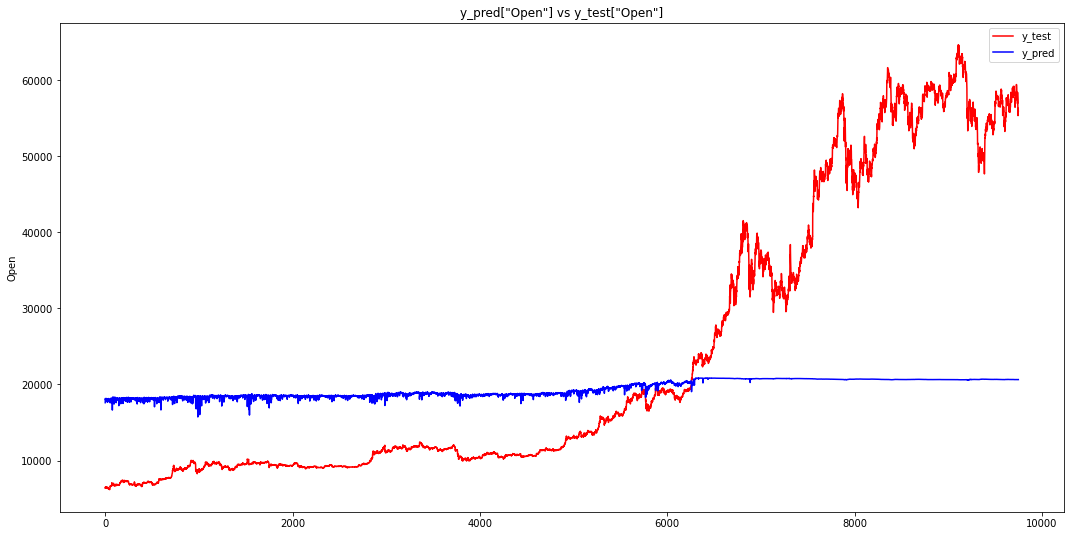

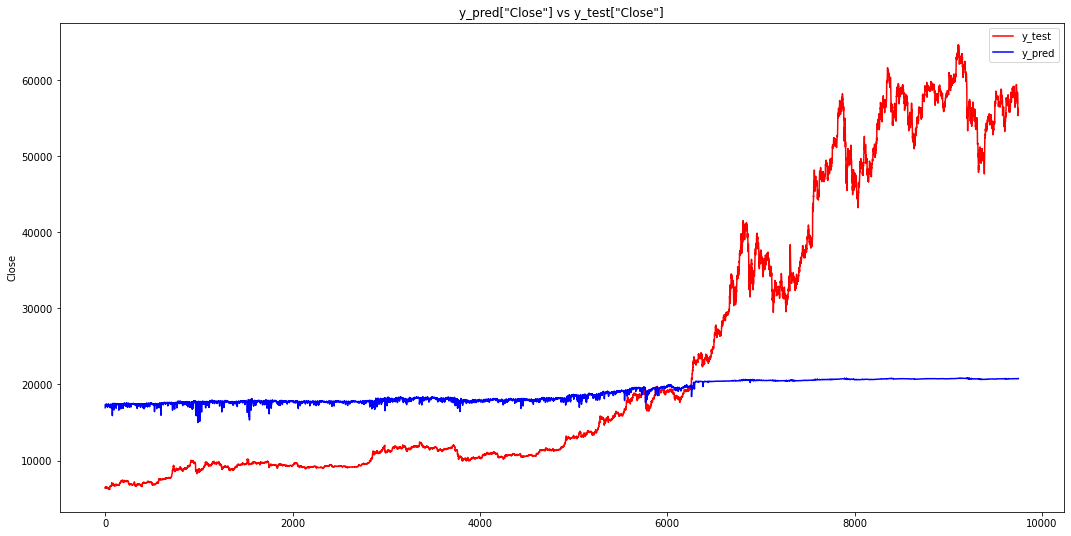

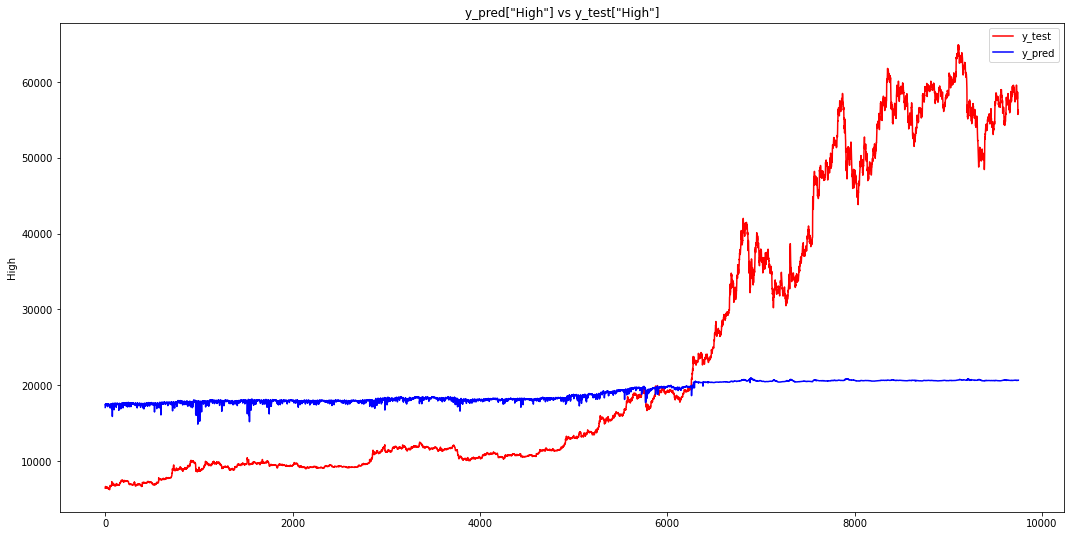

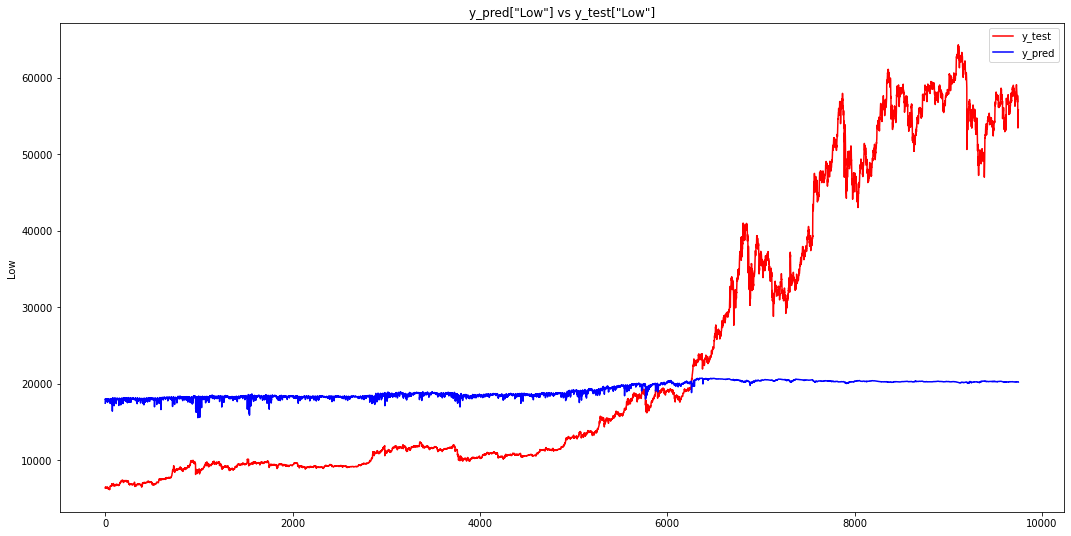

In [20]:
y_test = test[steps:].reset_index()


plt.figure(figsize = (18,9))
plt.plot(y_test['Open'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,0], color = 'blue', label = 'y_pred')
plt.title('y_pred["Open"] vs y_test["Open"]')
plt.ylabel('Open')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['Close'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,3], color = 'blue', label = 'y_pred')
plt.title('y_pred["Close"] vs y_test["Close"]')
plt.ylabel('Close')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['High'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,1], color = 'blue', label = 'y_pred')
plt.title('y_pred["High"] vs y_test["High"]')
plt.ylabel('High')
plt.legend()
plt.show()


plt.figure(figsize = (18,9))
plt.plot(y_test['Low'], color = 'red', label = 'y_test')
plt.plot(y_pred[:,2], color = 'blue', label = 'y_pred')
plt.title('y_pred["Low"] vs y_test["Low"]')
plt.ylabel('Low')
plt.legend()
plt.show()